In [1]:
!pip install allennlp
!pip install torch

import os
import sys
import json
import pickle
import random
import unicodedata
from tqdm import tqdm
from typing import Iterator, List, Dict
from collections import Counter, defaultdict
from itertools import combinations, permutations

from method import getEntity

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
# import torch
# from torch import optim
# from allennlp.data.tokenizers import Token
# from allennlp.data.fields import TextField, LabelField
# from allennlp.data import Instance
# from allennlp.data.dataset_readers import DatasetReader
# from allennlp.data.token_indexers import TokenIndexer, SingleIdTokenIndexer
# from allennlp.models import Model
# from allennlp.modules.seq2seq_encoders import Seq2SeqEncoder, PytorchSeq2SeqWrapper
# from allennlp.modules.seq2vec_encoders import PytorchSeq2VecWrapper, Seq2VecEncoder
# from allennlp.modules.text_field_embedders import TextFieldEmbedder, BasicTextFieldEmbedder
# from allennlp.data.vocabulary import Vocabulary
# from allennlp.training.metrics import CategoricalAccuracy
# from allennlp.nn.util import get_text_field_mask, sequence_cross_entropy_with_logits
# from allennlp.modules.token_embedders import Embedding
# from allennlp.data.iterators import BucketIterator,BasicIterator
# from allennlp.training.trainer import Trainer
# from allennlp.predictors import SentenceTaggerPredictor

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/zhengyuc/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/zhengyuc/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/zhengyuc/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/zhengyuc/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/zhengyuc/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/zhengyuc/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nl

True

# Distribution

In [9]:
label_count = Counter()
evidence_count = Counter()
sentence_length_count = Counter()
with open('train_input.txt', 'rb') as t:
    train_input = pickle.load(t)
    for t in tqdm(train_input):
        label_count[t['label']] += 1
        evidence_count[len(t['evidence'])] += 1
#         for e in t['evidence']:
#             sentence_length_count[len([word for word in word_tokenize(wiki_dict[e[0]][str(e[1])])])] += 1
res = evidence_count.most_common()
sentence_res = sentence_length_count.most_common()
label_res = label_count.most_common()
res.sort()
sentence_res.sort()
label_res.sort()

100%|██████████| 145449/145449 [00:00<00:00, 851866.42it/s]


[('NOT ENOUGH INFO', 35639), ('REFUTES', 29775), ('SUPPORTS', 80035)]


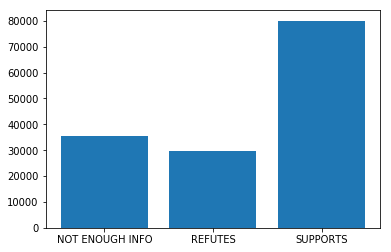

In [13]:
print(label_res)
fig, axes = plt.subplots()
bar = plt.bar([i for i, j in label_res],[j for i,j in label_res])

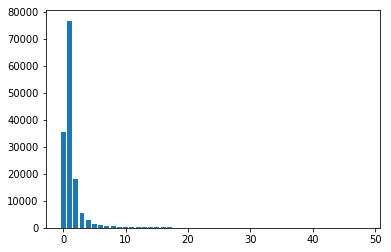

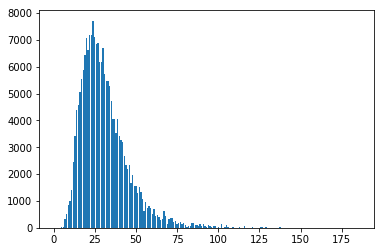

In [0]:
fig, axes = plt.subplots()
bar = plt.bar([i for i, j in res],[j for i,j in res])
fig, axes = plt.subplots()
bar = plt.bar([i for i, j in sentence_res],[j for i,j in sentence_res])

# Document Retrieval

In [6]:
input_path = 'Source/wiki-pages-text/'
wiki_dict = defaultdict(dict)

for i in tqdm(range(1, 110)):
    file_name = str(i).zfill(3)
    input_file = input_path + "wiki-" + file_name + '.txt'

    with open(input_file, 'r+') as wiki_file:
        for entry in wiki_file:
            entry = entry.split(' ')
            title = unicodedata.normalize('NFD', entry[0])
            label = unicodedata.normalize('NFD', entry[1])
            text = unicodedata.normalize('NFD', " ".join(entry[2:]))
            wiki_dict[title][label] = text

100%|██████████| 109/109 [02:31<00:00,  1.09s/it]


In [7]:
wiki_dict['Makani_Narayana_Rao']

{'0': 'Justice Makani Narayana Rao is a former Chief Justice of Himachal Pradesh and former chairperson of National Commission on Backward Classes better known as M N Rao , born on 22 April 1936 .\n',
 '1': 'Enrolled as an Advocate of the Andhra Pradesh High Court on 9 October 1961 .\n',
 '2': 'Practised for more than 12 years at high court especially constitutional law .\n',
 '3': 'Later in the year 1979 appointed as Law Secretary of the Government of Andhra Pradesh .\n',
 '4': 'Appointed as Selection Grade District Judge on 25 July 1983 .\n',
 '5': 'Worked as Chairman , Sales Tax Appellate Tribunal since 1 st July ,1985 .\n',
 '6': 'Later appointed Permanent Judge of the Andhra Pradesh High Court on 11 July 1986 .\n',
 '7': 'Transferred and Appointed as Chief Justice of Himachal Pradesh High Court on 6 November 1997 and retired on 22 April 1998 .\n'}

In [11]:
res = {}
with open('Source/test-unlabelled.json') as test_file:
    t = json.load(test_file)
    for key in tqdm(t):
        claim = t[key]['claim']
        tokenized = nltk.word_tokenize(claim)
        l = nltk.pos_tag(tokenized)
        entity = getEntity(l)
        alt = []
        for e in entity:
            if e in wiki_dict:
                alt.append(wiki_dict[e])
        res[key] = alt
#         print(claim)
#         print(key)
#         print(res[key])
with open('text_result.json', 'w') as file:
    json.dump(res, file)

100%|██████████| 14997/14997 [00:15<00:00, 951.48it/s] 


# Test Processing

In [22]:
test_claim = json.load(open('Source/test-unlabelled.json','r+'))
text_result = json.load(open('text_result.json','r+'))

result = {}
for key in tqdm(text_result):
    output = {}
    output['claim']=test_claim[key]['claim']
    output['string']=[]
    for evid_dict in text_result[key]:
        for evid_sent in evid_dict.values():
            output['string'].append(word_tokenize(evid_sent))
    result[key] = output
print(len(result))
with open('test_input.json','w+') as f :
    json.dump(result, f)
pickle.dump(result,open("test_input.txt",'wb'))

100%|██████████| 14997/14997 [00:46<00:00, 322.00it/s]


14997


# Read

In [2]:
with open('test_input.txt', 'rb') as test_file:
    result = pickle.load(test_file)

In [3]:
for key in tqdm(result):
    l = len(result[key]['string'])
    result[key]['evidence'] = []
    for i in range(1, 4):
        result[key]['evidence'] += list(permutations([x for x in range(l)], i))

100%|██████████| 14997/14997 [00:21<00:00, 683.50it/s]


In [7]:
sys.getsizeof(result)

786528

In [8]:
len(result)

14997

In [10]:
j = 0
for key in tqdm(result):
    print(result[key])
    j += 1
    if j >= 2:
        break

  0%|          | 0/14997 [00:00<?, ?it/s]

{'evidence': [(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 8), (7, 9), (7, 10), (7, 11), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 9), (8, 10), (8, 11), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 10), (9, 11), (10, 0), (10

In [14]:
json.dump(result, open('test.json', 'w'))
pickle.dump(result, open('test.txt', 'wb'))

KeyboardInterrupt: 

# DatasetReader

In [14]:
class VerbDatasetReader(DatasetReader):

    def __init__(self,sentence_indexers:Dict[str,TokenIndexer] = None)-> None:
        super().__init__(lazy=False)
        self.sentence_indexers=sentence_indexers or {"sentence":SingleIdTokenIndexer()}

    def text_to_instance(self, sentence:str ,labels:str = None)->Instance:
        sent_tokenized=[]
        for word in word_tokenize(sentence):
            sent_tokenized.append(Token(word))
#         print(sent_tokenized)
        sentence_field=TextField(sent_tokenized,self.sentence_indexers)
        fields={'sentence':sentence_field,'labels':LabelField(labels)}
        return Instance(fields)

    def _read(self, file_path: str)->Iterator[Instance]:
        with open(file_path, 'rb') as f:
            train = pickle.load(f)
            pre = ""
            for value in train:
                claim = value['claim']
                if value['label'] == "NOT ENOUGH INFO":
                    continue
                    instance = claim + ' ' + pre
                    yield self.text_to_instance(instance, value['label'])
                else:
                    instance = claim
                    i = 0
                    for e in value['evidence']:
                        pre = ' '.join(e)
                        instance += ' '  + pre
                        i += 1
                        if i >= 3:
                            break
                    yield self.text_to_instance(instance, value['label'])

reader=VerbDatasetReader()
train_dataset=reader.read('train_input.txt')

random.shuffle(train_dataset)

validation_set = train_dataset[:3000]
train_set = train_dataset[3000:]

109810it [01:04, 1711.59it/s]


# Embedding

In [15]:
vocab=Vocabulary.from_instances(train_dataset)

EMBEDDING_DIM = 300
HIDDEN_DIM = 6

token_embedding = Embedding(num_embeddings=vocab.get_vocab_size('tokens'), embedding_dim=EMBEDDING_DIM)
word_embeddings = BasicTextFieldEmbedder({"sentence": token_embedding})

100%|██████████| 109810/109810 [00:05<00:00, 19827.96it/s]


# Lstm

In [17]:
class Lstm(Model):
    def __init__(self,
                 word_embeddings:TextFieldEmbedder,
                 encoder:Seq2VecEncoder,
                 vocab:Vocabulary)->None:
        super().__init__(vocab)
        self.word_embeddings=word_embeddings
        self.encoder=encoder
        self.hidden2tag = torch.nn.Linear(in_features=encoder.get_output_dim(),out_features=vocab.get_vocab_size('labels'))
        self.accuracy = CategoricalAccuracy()

    def forward(self,
                sentence:Dict[str,torch.Tensor],
                labels:torch.Tensor==None)->Dict[str,torch.Tensor]:
        mask=get_text_field_mask(sentence)
        embeddings = self.word_embeddings(sentence)
        encoder_out = self.encoder(embeddings, mask)
        tag_logits=self.hidden2tag(encoder_out)
        output = {"tag_logits": tag_logits}
        if labels is not None:
            self.accuracy(tag_logits, labels)
            loss=torch.nn.CrossEntropyLoss()
            output['loss'] = loss(tag_logits,labels)
        return output

    def get_metrics(self, reset: bool = False) -> Dict[str, float]:
        return {"accuracy": self.accuracy.get_metric(reset)}

lstm = PytorchSeq2VecWrapper(torch.nn.LSTM(EMBEDDING_DIM, HIDDEN_DIM, batch_first=True))

model = Lstm(word_embeddings, lstm, vocab)

if torch.cuda.is_available():
    cuda_device = 0
    model = model.cuda(cuda_device)
else:
    cuda_device = -1

optimizer = optim.SGD(model.parameters(), lr=0.1)

iterator=BasicIterator()

iterator.index_with(vocab)

trainer = Trainer(model=model,
                  optimizer=optimizer,
                  iterator=iterator,
                  train_dataset=train_set,
                  validation_dataset=validation_set,
                  patience=10,
                  num_epochs=5,
                  cuda_device=cuda_device)

trainer.train()


  0%|          | 0/3338 [00:00<?, ?it/s]
accuracy: 0.7188, loss: 0.6550 ||:   0%|          | 1/3338 [00:00<14:07,  3.94it/s]
accuracy: 0.7448, loss: 0.6214 ||:   0%|          | 6/3338 [00:00<10:15,  5.42it/s]
accuracy: 0.7585, loss: 0.5961 ||:   0%|          | 11/3338 [00:00<07:31,  7.37it/s]
accuracy: 0.7344, loss: 0.6055 ||:   0%|          | 16/3338 [00:00<05:35,  9.90it/s]
accuracy: 0.7351, loss: 0.5999 ||:   1%|          | 21/3338 [00:00<04:14, 13.02it/s]
accuracy: 0.7407, loss: 0.5907 ||:   1%|          | 27/3338 [00:00<03:16, 16.84it/s]
accuracy: 0.7396, loss: 0.5888 ||:   1%|          | 33/3338 [00:00<02:37, 21.01it/s]
accuracy: 0.7396, loss: 0.5866 ||:   1%|          | 39/3338 [00:01<02:08, 25.63it/s]
accuracy: 0.7438, loss: 0.5806 ||:   1%|▏         | 45/3338 [00:01<01:47, 30.51it/s]
accuracy: 0.7412, loss: 0.5823 ||:   1%|▏         | 50/3338 [00:01<01:35, 34.39it/s]
accuracy: 0.7388, loss: 0.5836 ||:   2%|▏         | 56/3338 [00:01<01:25, 38.41it/s]
accuracy: 0.7374, loss: 0

{'best_epoch': 4,
 'best_validation_accuracy': 0.731,
 'best_validation_loss': 0.5804825181022604,
 'epoch': 4,
 'peak_cpu_memory_MB': 5003.684,
 'peak_gpu_0_memory_MB': 1033,
 'training_accuracy': 0.728789439191087,
 'training_cpu_memory_MB': 5003.684,
 'training_duration': '00:04:25',
 'training_epochs': 4,
 'training_gpu_0_memory_MB': 1033,
 'training_loss': 0.5804883599227741,
 'training_start_epoch': 0,
 'validation_accuracy': 0.731,
 'validation_loss': 0.5804825181022604}

In [0]:
predictor = SentenceTaggerPredictor(model, dataset_reader=reader)
for i in range(1600, 2000):
    tag_logits = predictor.predict_instance(train_dataset[i])
    tag_ids = np.argmax(tag_logits, axis=-1)
    print(tag_ids)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [0]:
with open("test.th", 'wb') as f:
    torch.save(model.state_dict(), f)
    
vocab.save_to_files("vocabulary")